# Кучера Жанна 20 МАГ ИАД

0. Описать задачу словами +
1. Прочитать данные +
2. Визуализировать данные и вычислить основные характеристики (среднее, разброс, корреляционную матрицу и т.д.). Интерпретировать. +
3. Обработать пропущенные значения (или убедиться, что их нет) +
4. Обработать категориальные признаки +
5. Провести нормализацию (или объяснить, почему в вашем случае она не нужна) +
6. Разбить данные на обучающую и тестовую выборки +
7. Запустить классификатор ближайших соседей (попробовать разное их количество)+
8. Вычислить ошибки на обучающей и тестовой выборках. Сделать выводы +
9. По желанию: запустить другие классификаторы. Сравнить результаты
10. По желанию: как-то побороться с несбалансированностью классов (если она есть)
11. По желанию: исключить коррелированные переменные (объяснить зачем)
12. Сделать общие выводы" +

# Описание задачи

У компании N есть цель выбрать маркетинговую стратегию для повышения продаж продукта/услуги. Необходимо выявить влияние каждой маркетинговой кампании на определенного потребителя.

Для решения данной задачи были собраны личные данные о потребителях (уровень образования, семейное положение, количество детей, доход), данные о поведении потребителя (траты на покупку определенной продукции, место покупки, жалобы), принятии потребителем определенного предложения (проводимым по пяти разным стратегиям + отдельно по текущей).

Задача сводится к задаче классификации: нужно предсказать, примет ли потребитель текущее предложение (1 - примет, 0 - не примет), в зависимости от определенного покупательского поведения и личных данных.

In [1]:
import numpy as np              # Массивы (матрицы, векторы, линейная алгебра)
import matplotlib.pyplot as plt # Научная графика
%matplotlib inline 
    # Говорим jupyter'у, чтобы весь графический вывод был в браузере, а не в отдельном окне
import pandas as pd             # Таблицы и временные ряды (dataframe, series)
import seaborn as sns           # Еще больше красивой графики для визуализации данных
import sklearn                  # Алгоритмы машинного обучения

# Чтение данных

Увеличим размерность показываемой таблицы для удобства

In [2]:
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 50)

Читаем данные

In [3]:
data_raw = pd.read_csv('marketing_campaign.csv')

In [4]:
data_raw.shape

(2240, 29)

In [5]:
data_raw.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [6]:
data_raw.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

##### Личные данные
- ID - номер клиента
- Year_Birth - год рождения клиента
- Education - уровень образования клиента
- Marital_Status - семейное положение клиента
- Income - доход клиента
- Kidhome - количество маленьких детей в семье
- Teenhome - количество подростков в семье
- Dt_Customer - дата регистрации клиента
- Recency - количество прошедших дней со дня последней покупки клиента
##### Траты на определенные продукты за 2 года
- MntWines - вино
- MntFruits - фрукты
- MntMeatProducts - мясо
- MntFishProducts - рыба
- MntSweetProducts - сладкое
- MntGoldProds - золотые изделия
##### Поведение потребителя
- NumDealsPurchases - количество покупок со скидкой
- NumWebPurchases - количество покупок через веб-сайт
- NumCatalogPurchases - количество покупок через каталог
- NumStorePurchases - количество покупок, совершенные в магазине
- NumWebVisitsMonth - Количество посещений веб-сайта за последний месяц
##### Ответ на предложения по определенным маркетинговым кампаниям (1 - принял, 0 - не принял)
- AcceptedCmp1
- AcceptedCmp2
- AcceptedCmp3
- AcceptedCmp4
- AcceptedCmp5
##### Жалобы
- Complain - 1, если клиент жаловался в последние 2 года
##### Пока неизвестные признаки
- Z_CostContact - неизвестный признак
- Z_Revenue - неизвестный признак
##### Ответ на текущее предложение
- Response - 1, если клиент принял предложение по последней рекламной акции, иначе 0

#### Приведем к соответствию типы признаков

In [7]:
data_raw.dtypes

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object

Категориальные признаки:

In [8]:
data_raw['Education'] = data_raw['Education'].astype('category')
data_raw['Marital_Status'] = data_raw['Marital_Status'].astype('category')

Дата:

In [9]:
data_raw['Dt_Customer'] = pd.to_datetime(data_raw['Dt_Customer'])
data_raw['Year_Birth'] = pd.to_datetime(data_raw['Year_Birth'], format="%Y")

In [10]:
data_raw.dtypes

ID                              int64
Year_Birth             datetime64[ns]
Education                    category
Marital_Status               category
Income                        float64
Kidhome                         int64
Teenhome                        int64
Dt_Customer            datetime64[ns]
Recency                         int64
MntWines                        int64
MntFruits                       int64
MntMeatProducts                 int64
MntFishProducts                 int64
MntSweetProducts                int64
MntGoldProds                    int64
NumDealsPurchases               int64
NumWebPurchases                 int64
NumCatalogPurchases             int64
NumStorePurchases               int64
NumWebVisitsMonth               int64
AcceptedCmp3                    int64
AcceptedCmp4                    int64
AcceptedCmp5                    int64
AcceptedCmp1                    int64
AcceptedCmp2                    int64
Complain                        int64
Z_CostContac

Посмотрим, какие значения принимают категориальные данные

In [11]:
data_raw['Marital_Status'].value_counts()

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
YOLO          2
Absurd        2
Name: Marital_Status, dtype: int64

In [12]:
data_raw['Marital_Status'].replace(to_replace=["Alone", "YOLO", "Absurd"], value="Single", inplace=True)

Можно заметить, что есть два отдельных признака: Single и Alone, что в целом означает одно и то же. Заменим значения Alone на Single. Ответы "YOLO" и "Absurd" также заменим на "Single", так как их мало и они не несут нам почти никакой информации. Чисто интуитивно их можно отнести к "Single".

In [13]:
print(data_raw['Marital_Status'].value_counts())
data_raw['Marital_Status'] = data_raw['Marital_Status'].astype('category')

Married     864
Together    580
Single      487
Divorced    232
Widow        77
Name: Marital_Status, dtype: int64


Номер ID не нужен для дальнейшего анализа данных. Уберем признак.

In [14]:
data_raw = data_raw.drop(['ID'], axis=1)

Отберем бинарные, категориальные, численные признаки.

In [15]:
def getEachTypeCols(data):
    bincol = [c for c in data.columns 
              if data[c].value_counts().index.isin([0,1]).all()]
    categorical = [c for c in data.columns 
                   if data[c].dtype.name == 'category']
    numerical = [c for c in data.columns
                 if ((data[c].dtype.name == 'int64' 
                      or data[c].dtype.name == 'float64'))
                 and c not in bincol]
    date = [c for c in data.columns 
                    if data[c].dtype.name == 'datetime64[ns]']
    ser = {'binary': bincol,
                'categorical': categorical,
                'numerical': numerical,
                'date': date}
    ret_ser = pd.Series(ser)
    return ret_ser

cols = getEachTypeCols(data_raw)
print(cols)

binary         [AcceptedCmp3, AcceptedCmp4, AcceptedCmp5, Acc...
categorical                          [Education, Marital_Status]
numerical      [Income, Kidhome, Teenhome, Recency, MntWines,...
date                                   [Year_Birth, Dt_Customer]
dtype: object


In [16]:
print(cols.get("date"))
print(cols.get("numerical"))

['Year_Birth', 'Dt_Customer']
['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'Z_CostContact', 'Z_Revenue']


Заменим значения дат на численные значение: количество прошедших дней со дня регистрации вместо самой даты регистрации и возраст покупателя вместо его года рождения. 

In [17]:
today = pd.Timestamp('now')
data_raw['age'] = (today - data_raw['Year_Birth']).astype('<m8[Y]').astype('int64')

In [18]:
data_raw['Days_customer'] = (today - data_raw['Dt_Customer']).astype('<m8[D]').astype('int64')
data_raw.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,age,Days_customer
0,1957-01-01,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,63,2961
1,1954-01-01,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,66,2411
2,1965-01-01,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,55,2610
3,1984-01-01,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,36,2437
4,1981-01-01,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,39,2459


In [19]:
date_cols = getEachTypeCols(data_raw).get('date')
date_cols

['Year_Birth', 'Dt_Customer']

In [20]:
data_raw.drop(date_cols, axis=1, inplace=True)

In [21]:
data_raw.dtypes

Education              category
Marital_Status         category
Income                  float64
Kidhome                   int64
Teenhome                  int64
Recency                   int64
MntWines                  int64
MntFruits                 int64
MntMeatProducts           int64
MntFishProducts           int64
MntSweetProducts          int64
MntGoldProds              int64
NumDealsPurchases         int64
NumWebPurchases           int64
NumCatalogPurchases       int64
NumStorePurchases         int64
NumWebVisitsMonth         int64
AcceptedCmp3              int64
AcceptedCmp4              int64
AcceptedCmp5              int64
AcceptedCmp1              int64
AcceptedCmp2              int64
Complain                  int64
Z_CostContact             int64
Z_Revenue                 int64
Response                  int64
age                       int64
Days_customer             int64
dtype: object

## Пропущенные значения

Проверим пропущенные значения в датасете.

In [22]:
data_raw.isna().sum()

Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
age                     0
Days_customer           0
dtype: int64

In [23]:
data_raw.shape

(2240, 28)

Сколько в процентном соотношении отсутствующих значений

In [24]:
null_value = data_raw.isna().sum()
percent_of_nulls = null_value/data_raw.shape[0]*100

In [25]:
pd.DataFrame({'Missings':null_value, '%': percent_of_nulls})

,Missings,%
Education,0,0.000000
Marital_Status,0,0.000000
Income,24,1.071429
Kidhome,0,0.000000
Teenhome,0,0.000000
Recency,0,0.000000
MntWines,0,0.000000
MntFruits,0,0.000000
MntMeatProducts,0,0.000000
MntFishProducts,0,0.000000


Неизвестен доход одного процента людей из выборки. Можем восстановить значения с помощью модели линейной регрессии. Обработаем пропущенные значения после небольшой работы с данными.

# Визуализация данных

In [26]:
data_raw.describe()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,age,Days_customer
count,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000,2240.000000,2240.000000
mean,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107,51.194196,2651.582143
std,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274,11.984069,202.122512
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,24.000000,2298.000000
25%,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,43.000000,2478.750000
50%,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,50.000000,2653.500000
75%,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,61.000000,2827.000000
max,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000,127.000000,2997.000000


In [27]:
data_raw.describe().shape

(8, 26)

При беглом осмотре можно заключить, что два признака (Z_CostContact и Z_Revenue) для всех строк имеют одно и то же значение: 3 и 11 соответственно. Избавимся от данных, стандартное отклонение которых равняется нулю.

In [28]:
std = data_raw.describe().iloc[2,:]
const_lab = [std[std==0.00].index[0], std[std==0.00].index[1]]
const_lab

['Z_CostContact', 'Z_Revenue']

In [29]:
data_raw.drop(labels=const_lab, axis=1, inplace=True)

In [30]:
data_raw.shape

(2240, 26)

In [31]:
data_raw.describe()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,age,Days_customer
count,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,0.149107,51.194196,2651.582143
std,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.356274,11.984069,202.122512
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,24.000000,2298.000000
25%,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,43.000000,2478.750000
50%,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,2653.500000
75%,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,61.000000,2827.000000
max,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,127.000000,2997.000000


In [32]:
data_raw.dtypes

Education              category
Marital_Status         category
Income                  float64
Kidhome                   int64
Teenhome                  int64
Recency                   int64
MntWines                  int64
MntFruits                 int64
MntMeatProducts           int64
MntFishProducts           int64
MntSweetProducts          int64
MntGoldProds              int64
NumDealsPurchases         int64
NumWebPurchases           int64
NumCatalogPurchases       int64
NumStorePurchases         int64
NumWebVisitsMonth         int64
AcceptedCmp3              int64
AcceptedCmp4              int64
AcceptedCmp5              int64
AcceptedCmp1              int64
AcceptedCmp2              int64
Complain                  int64
Response                  int64
age                       int64
Days_customer             int64
dtype: object

In [33]:
data_raw.describe(include=['category'])

,Education,Marital_Status
count,2240,2240
unique,5,5
top,Graduation,Married
freq,1127,864


Максимум в признаке Income слишком отличается от среднего. Возможно, стоит избавиться от слишком больших значений. Проверим значения кванителей.

In [34]:
data_raw['Income'].quantile([0.005,.01,.05,.1,.5,.9,.95,.99,.995])

0.005      7500.00
0.010      7579.20
0.050     18985.50
0.100     24117.50
0.500     51381.50
0.900     79844.00
0.950     84130.00
0.990     94458.80
0.995    102145.75
Name: Income, dtype: float64

In [35]:
rows_to_drop = data_raw[(data_raw['Income'] > data_raw['Income'].quantile(0.995))].index
data = data_raw.drop(rows_to_drop)
data.shape

(2228, 26)

In [36]:
data.describe()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,age,Days_customer
count,2204.000000,2228.000000,2228.000000,2228.000000,2228.000000,2228.000000,2228.000000,2228.000000,2228.000000,2228.000000,2228.000000,2228.000000,2228.000000,2228.000000,2228.000000,2228.000000,2228.000000,2228.000000,2228.000000,2228.000000,2228.000000,2228.000000,2228.000000,2228.000000
mean,51534.943739,0.445242,0.508079,49.152603,304.604129,26.266158,165.307002,37.572711,26.921005,44.058797,2.321813,4.083034,2.629264,5.802513,5.336625,0.073160,0.074057,0.071813,0.063285,0.013016,0.009425,0.148564,51.203321,2651.480700
std,20601.087428,0.538721,0.544744,28.949782,336.544743,39.635118,219.487420,54.615944,40.824639,52.082623,1.894176,2.731482,2.789081,3.234379,2.413993,0.260457,0.261923,0.258236,0.243530,0.113369,0.096648,0.355738,11.988711,202.187638
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,24.000000,2298.000000
25%,35191.500000,0.000000,0.000000,24.000000,24.000000,1.750000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,43.000000,2478.750000
50%,51258.500000,0.000000,0.000000,49.500000,176.000000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,2653.000000
75%,68143.500000,1.000000,1.000000,74.000000,505.000000,33.000000,231.250000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,61.000000,2827.000000
max,101970.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,127.000000,2997.000000


Максимальный возраст, 127, тоже выходит за пределы разумного. Избавимся от подобных данных.

In [37]:
age_sort = data['age'].sort_values(ascending=False)
age_sort.head()

239     127
339     121
192     120
1950     80
424      79
Name: age, dtype: int64

In [38]:
data['age'].quantile([0.005,.01,.05,.1,.5,.9,.95,.99,.999])

0.005     27.00
0.010     28.00
0.050     32.00
0.100     36.00
0.500     50.00
0.900     68.00
0.950     70.00
0.990     75.00
0.999    110.92
Name: age, dtype: float64

In [39]:
rows_to_drop = data[(data['age'] > data['age'].quantile(0.999))].index
data = data.drop(rows_to_drop)

In [40]:
print(data.shape)
data.describe()

(2225, 26)


,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,age,Days_customer
count,2201.000000,2225.000000,2225.000000,2225.000000,2225.000000,2225.000000,2225.000000,2225.000000,2225.000000,2225.000000,2225.000000,2225.000000,2225.000000,2225.000000,2225.000000,2225.000000,2225.000000,2225.000000,2225.000000,2225.000000,2225.000000,2225.000000,2225.000000,2225.000000
mean,51523.244889,0.445393,0.508315,49.147865,304.665169,26.234157,165.271461,37.570337,26.926742,44.005393,2.323596,4.085393,2.629663,5.806742,5.339326,0.073258,0.074157,0.071461,0.063371,0.013034,0.008989,0.148764,51.106966,2651.689888
std,20600.563074,0.538790,0.544799,28.943355,336.521413,39.576927,219.422585,54.626920,40.837715,51.968628,1.894831,2.732184,2.789275,3.234322,2.413691,0.260619,0.262086,0.257651,0.243683,0.113444,0.094403,0.355936,11.705210,202.203358
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,24.000000,2298.000000
25%,35178.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,43.000000,2479.000000
50%,51250.000000,0.000000,0.000000,50.000000,176.000000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,2653.000000
75%,68142.000000,1.000000,1.000000,74.000000,505.000000,33.000000,231.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,61.000000,2827.000000
max,101970.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,80.000000,2997.000000


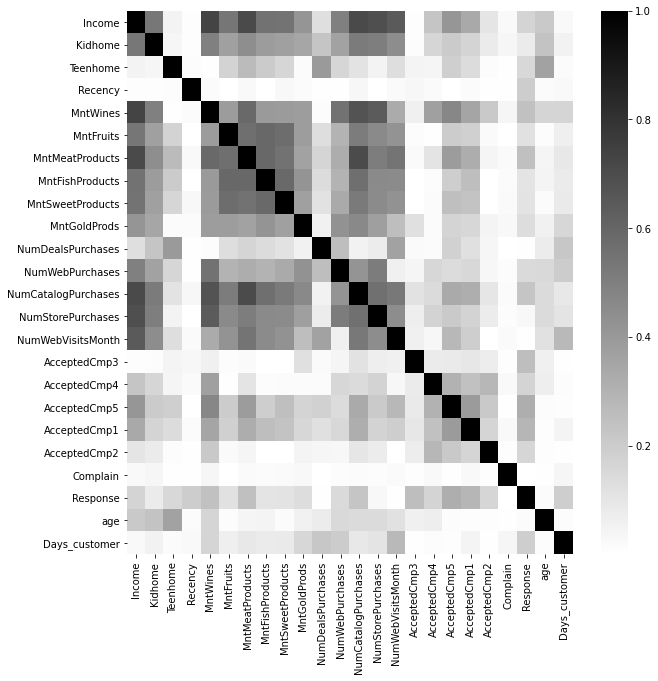

In [41]:
correl_lin2 = data.corr()
plt.figure(figsize=(10,10))
sns.heatmap(abs(correl_lin2), cmap='binary')
pass

Попробуем ввести дополнительные данные из имеющихся, которые могли бы нам помочь в описании данных. Например, общее количество купленных продуктов.

In [42]:
data.iloc[:,6:12]

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
0,635,88,546,172,88,88
1,11,1,6,2,1,6
2,426,49,127,111,21,42
3,11,4,20,10,3,5
4,173,43,118,46,27,15
...,...,...,...,...,...,...
2235,709,43,182,42,118,247
2236,406,0,30,0,0,8
2237,908,48,217,32,12,24
2238,428,30,214,80,30,61


In [43]:
data['MntAllProds'] = data.iloc[:,6:12].sum(axis=1)

In [44]:
data.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,age,Days_customer,MntAllProds
0,Graduation,Single,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,63,2961,1617
1,Graduation,Single,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,66,2411,27
2,Graduation,Together,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,55,2610,776
3,Graduation,Together,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,36,2437,53
4,PhD,Married,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,39,2459,422


Возможно, стоит объединить количество детей.

In [45]:
data.iloc[:,3:5]

,Kidhome,Teenhome
0,0,0
1,1,1
2,0,0
3,1,0
4,1,0
...,...,...
2235,0,1
2236,2,1
2237,0,0
2238,0,1


In [46]:
data['Children'] = data.iloc[:,3:5].sum(axis=1)

In [47]:
data

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,age,Days_customer,MntAllProds,Children
0,Graduation,Single,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,63,2961,1617,0
1,Graduation,Single,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,66,2411,27,2
2,Graduation,Together,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,55,2610,776,0
3,Graduation,Together,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,36,2437,53,1
4,PhD,Married,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,39,2459,422,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,Graduation,Married,61223.0,0,1,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,0,53,2679,1341,1
2236,PhD,Together,64014.0,2,1,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,0,74,2317,444,3
2237,Graduation,Divorced,56981.0,0,0,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,0,39,2453,1241,0
2238,Master,Together,69245.0,0,1,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,0,64,2454,843,1


In [48]:
data.describe()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,age,Days_customer,MntAllProds,Children
count,2201.000000,2225.000000,2225.000000,2225.000000,2225.000000,2225.000000,2225.000000,2225.000000,2225.000000,2225.000000,2225.000000,2225.000000,2225.000000,2225.000000,2225.000000,2225.000000,2225.000000,2225.000000,2225.000000,2225.000000,2225.000000,2225.000000,2225.000000,2225.000000,2225.000000,2225.000000
mean,51523.244889,0.445393,0.508315,49.147865,304.665169,26.234157,165.271461,37.570337,26.926742,44.005393,2.323596,4.085393,2.629663,5.806742,5.339326,0.073258,0.074157,0.071461,0.063371,0.013034,0.008989,0.148764,51.106966,2651.689888,604.673258,0.953708
std,20600.563074,0.538790,0.544799,28.943355,336.521413,39.576927,219.422585,54.626920,40.837715,51.968628,1.894831,2.732184,2.789275,3.234322,2.413691,0.260619,0.262086,0.257651,0.243683,0.113444,0.094403,0.355936,11.705210,202.203358,600.817240,0.751567
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,24.000000,2298.000000,5.000000,0.000000
25%,35178.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,43.000000,2479.000000,69.000000,0.000000
50%,51250.000000,0.000000,0.000000,50.000000,176.000000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,2653.000000,396.000000,1.000000
75%,68142.000000,1.000000,1.000000,74.000000,505.000000,33.000000,231.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,61.000000,2827.000000,1042.000000,1.000000
max,101970.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,80.000000,2997.000000,2525.000000,3.000000


Объединим также количество совершенных покупок.

In [49]:
data.iloc[:,12:16]

,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases
0,3,8,10,4
1,2,1,1,2
2,1,8,2,10
3,2,2,0,4
4,5,5,3,6
...,...,...,...,...
2235,2,9,3,4
2236,7,8,2,5
2237,1,2,3,13
2238,2,6,5,10


In [50]:
data['NumPurchases'] = data.iloc[:,12:16].sum(axis=1)

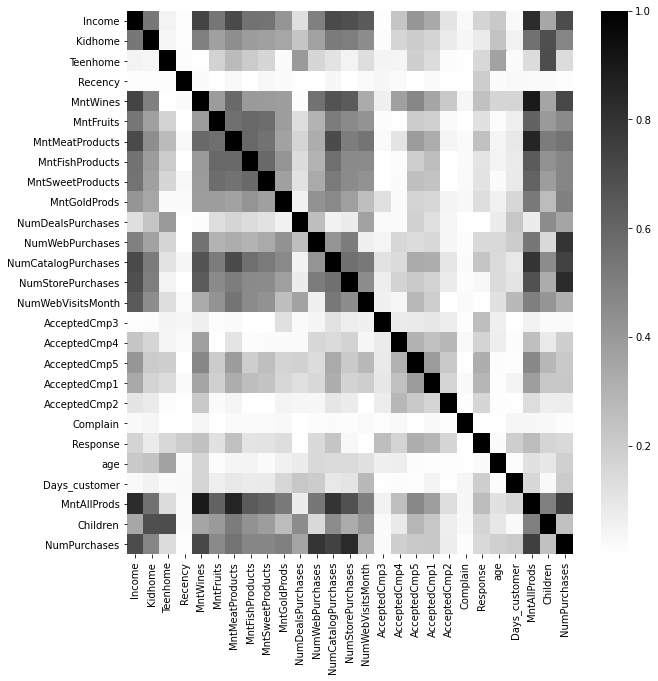

In [51]:
plt.figure(figsize=(10,10))
sns.heatmap(abs(data.corr()), cmap='binary')
pass

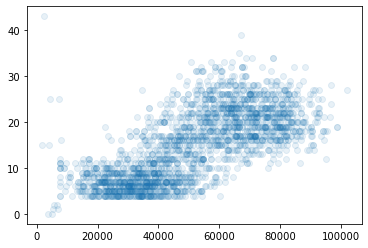

In [52]:
plt.scatter(data['Income'], data['NumPurchases'], alpha=0.1)
pass

In [53]:
data['NumPurchases'].quantile([0.005,.01,.05,.1,.5,.9,.95,.99,.995])

0.005     4.00
0.010     4.00
0.050     4.00
0.100     5.00
0.500    15.00
0.900    25.00
0.950    27.00
0.990    31.76
0.995    32.00
Name: NumPurchases, dtype: float64

In [54]:
rows_to_drop = data[(data['NumPurchases'] < data['NumPurchases'].quantile(0.005)) |
                         (data['NumPurchases'] > data['NumPurchases'].quantile(0.995))].index
data = data.drop(rows_to_drop)
data.shape

(2207, 29)

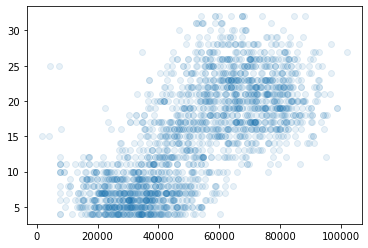

In [55]:
plt.scatter(data['Income'], data['NumPurchases'], alpha=0.1)
pass

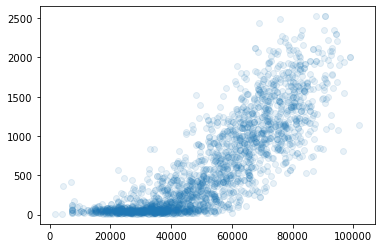

In [56]:
plt.scatter(data['Income'], data['MntAllProds'], alpha=0.1)
pass

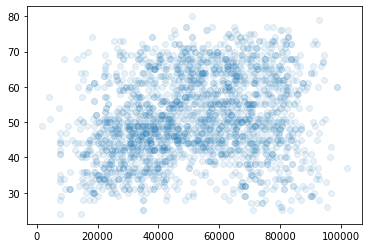

In [57]:
plt.scatter(data['Income'], data['age'], alpha=0.1)
pass

In [58]:
data

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,age,Days_customer,MntAllProds,Children,NumPurchases
0,Graduation,Single,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,63,2961,1617,0,25
1,Graduation,Single,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,66,2411,27,2,6
2,Graduation,Together,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,55,2610,776,0,21
3,Graduation,Together,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,36,2437,53,1,8
4,PhD,Married,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,39,2459,422,1,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,Graduation,Married,61223.0,0,1,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,0,53,2679,1341,1,18
2236,PhD,Together,64014.0,2,1,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,0,74,2317,444,3,22
2237,Graduation,Divorced,56981.0,0,0,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,0,39,2453,1241,0,19
2238,Master,Together,69245.0,0,1,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,0,64,2454,843,1,23


Посмотрим, сколько людей откликались на какую-либо из компаний. Введем новый столбец.

In [59]:
data.iloc[:,17:22]

,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2
0,0,0,0,0,0
1,0,0,0,0,0
2,0,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,0
...,...,...,...,...,...
2235,0,0,0,0,0
2236,0,0,0,1,0
2237,0,1,0,0,0
2238,0,0,0,0,0


In [60]:
data['SumAcceptedCmp'] = data.iloc[:,17:22].sum(axis=1)

In [61]:
data['SumAcceptedCmp'].value_counts()

0    1753
1     319
2      82
3      43
4      10
Name: SumAcceptedCmp, dtype: int64

Большинство покупателей не откликались ни на одно предложение.

In [62]:
data.isna().sum()

Education               0
Marital_Status          0
Income                 23
Kidhome                 0
Teenhome                0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Response                0
age                     0
Days_customer           0
MntAllProds             0
Children                0
NumPurchases            0
SumAcceptedCmp          0
dtype: int64

In [63]:
corr_raw = abs(data.corr())
cmap = sns.diverging_palette(5, 250, as_cmap=True)
vis1 = corr_raw.style.background_gradient(cmap, axis=1)
vis1

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,age,Days_customer,MntAllProds,Children,NumPurchases,SumAcceptedCmp
Income,1.000000,0.536280,0.043736,0.006877,0.735605,0.537488,0.725714,0.552044,0.552161,0.422756,0.139752,0.493145,0.737339,0.686831,0.649524,0.011765,0.230054,0.413801,0.340228,0.104015,0.027852,0.165200,0.214326,0.030638,0.832214,0.352643,0.706989,0.384195
Kidhome,0.536280,1.000000,0.036202,0.006184,0.499214,0.374770,0.454927,0.389875,0.374060,0.352621,0.234053,0.368578,0.534274,0.510197,0.467100,0.014644,0.161082,0.204891,0.170837,0.080859,0.036050,0.075915,0.235946,0.052440,0.559067,0.690105,0.490500,0.211217
Teenhome,0.043736,0.036202,1.000000,0.012301,0.002597,0.178194,0.271681,0.210669,0.170170,0.022104,0.403758,0.156042,0.118832,0.043693,0.132469,0.048252,0.044129,0.188229,0.139561,0.012341,0.007620,0.158295,0.363560,0.015574,0.143580,0.698252,0.131279,0.126232
Recency,0.006877,0.006184,0.012301,1.000000,0.014477,0.003423,0.027138,0.002047,0.026162,0.019830,0.010689,0.008344,0.031295,0.002368,0.021910,0.040661,0.021088,0.003926,0.013412,0.004170,0.005365,0.203580,0.017223,0.023562,0.020926,0.013338,0.004707,0.010083
MntWines,0.735605,0.499214,0.002597,0.014477,1.000000,0.387838,0.605889,0.392499,0.386751,0.385688,0.002662,0.544271,0.685633,0.639978,0.336557,0.058299,0.381687,0.477167,0.353357,0.213879,0.036128,0.239443,0.162102,0.159265,0.898348,0.359478,0.723282,0.518239
MntFruits,0.537488,0.374770,0.178194,0.003423,0.387838,1.000000,0.581285,0.592740,0.575566,0.386564,0.139294,0.299269,0.527674,0.458257,0.432488,0.013563,0.006264,0.203369,0.187800,0.022133,0.002805,0.117843,0.015548,0.064325,0.618716,0.397501,0.463777,0.149938
MntMeatProducts,0.725714,0.454927,0.271681,0.027138,0.605889,0.581285,1.000000,0.607526,0.567050,0.380305,0.205386,0.336173,0.708720,0.532035,0.554728,0.023470,0.100528,0.399431,0.334003,0.042898,0.020442,0.252692,0.044536,0.082363,0.863673,0.522622,0.558580,0.329611
MntFishProducts,0.552044,0.389875,0.210669,0.002047,0.392499,0.592740,0.607526,1.000000,0.587746,0.420641,0.157726,0.290249,0.576130,0.454424,0.464534,0.003057,0.017253,0.195339,0.259839,0.003193,0.018823,0.103387,0.042201,0.075150,0.644709,0.431839,0.471949,0.175086
MntSweetProducts,0.552161,0.374060,0.170170,0.026162,0.386751,0.575566,0.567050,0.587746,1.000000,0.371632,0.143539,0.325620,0.530616,0.449087,0.441426,0.002400,0.020551,0.257507,0.240075,0.002796,0.020041,0.109975,0.013886,0.077127,0.611908,0.391182,0.469434,0.194169
MntGoldProds,0.422756,0.352621,0.022104,0.019830,0.385688,0.386564,0.380305,0.420641,0.371632,1.000000,0.045108,0.433157,0.481761,0.378367,0.269753,0.129632,0.020762,0.171786,0.163539,0.044149,0.030015,0.136619,0.059525,0.157699,0.528048,0.268597,0.506543,0.190568


In [64]:
X = data.copy()
y = X["Income"]
y = y[-y.isna()]

In [65]:
y

0       58138.0
1       46344.0
2       71613.0
3       26646.0
4       58293.0
         ...   
2235    61223.0
2236    64014.0
2237    56981.0
2238    69245.0
2239    52869.0
Name: Income, Length: 2184, dtype: float64

In [66]:
X["Marital_Status"] = pd.Categorical(X["Marital_Status"])
X["Marital_Status"] = X["Marital_Status"].cat.codes

X["Education"] = pd.Categorical(X["Education"])
X["Education"] = X["Education"].cat.codes

In [67]:
x_pred = X[X.Income.isna()]
x_pred = x_pred.drop(columns="Income")
x_pred

,Education,Marital_Status,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,age,Days_customer,MntAllProds,Children,NumPurchases,SumAcceptedCmp
10,2,1,1,0,11,5,5,6,0,2,1,1,1,0,2,7,0,0,0,0,0,0,0,37,2524,19,1,4,0
27,2,2,1,0,19,5,1,3,3,263,362,0,27,0,0,1,0,0,0,0,0,0,0,34,2792,637,1,27,0
43,4,2,0,0,80,81,11,50,3,2,39,1,1,3,4,2,0,0,0,0,0,0,0,61,2534,186,0,9,0
48,2,2,2,1,96,48,5,48,6,10,7,3,2,1,4,6,0,0,0,0,0,0,0,69,2477,124,3,10,0
58,2,2,1,0,57,11,3,22,2,2,6,2,2,0,3,6,0,0,0,0,0,0,0,38,2675,46,1,7,0
71,0,1,1,0,25,25,3,43,17,4,17,3,3,0,3,8,0,0,0,0,0,0,0,47,2951,109,1,9,0
90,4,1,2,1,4,230,42,192,49,37,53,12,7,2,8,9,0,0,0,0,0,0,0,63,2885,603,3,29,0
91,2,2,1,1,45,7,0,8,2,0,1,1,1,0,2,7,0,0,0,0,0,0,0,63,2331,18,2,4,0
92,3,3,0,0,87,445,37,359,98,28,18,1,2,4,8,1,0,0,0,0,0,0,0,47,2516,985,0,15,0
128,4,1,0,1,23,352,0,27,10,0,15,3,6,1,7,6,0,0,0,0,0,0,0,59,2651,404,1,17,0


In [68]:
X = X[-X.Income.isna()]
X = X.drop(columns="Income")
X

,Education,Marital_Status,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,age,Days_customer,MntAllProds,Children,NumPurchases,SumAcceptedCmp
0,2,2,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,63,2961,1617,0,25,0
1,2,2,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,66,2411,27,2,6,0
2,2,3,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,55,2610,776,0,21,0
3,2,3,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,36,2437,53,1,8,0
4,4,1,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,39,2459,422,1,19,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,2,1,0,1,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,0,53,2679,1341,1,18,0
2236,4,3,2,1,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,0,74,2317,444,3,22,1
2237,2,0,0,0,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,0,39,2453,1241,0,19,1
2238,3,3,0,1,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,0,64,2454,843,1,23,0


In [69]:
from sklearn.linear_model import LinearRegression
linreg_model = LinearRegression()
linreg_model.fit(X, y)
y_pred = linreg_model.predict(x_pred)

In [70]:
y_pred.shape

(23,)

In [71]:
indexes_of_null = data.loc[data.Income.isna(), :].index
null_rows = data.loc[indexes_of_null, :]
null_rows

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,age,Days_customer,MntAllProds,Children,NumPurchases,SumAcceptedCmp
10,Graduation,Married,NaN,1,0,11,5,5,6,0,2,1,1,1,0,2,7,0,0,0,0,0,0,0,37,2524,19,1,4,0
27,Graduation,Single,NaN,1,0,19,5,1,3,3,263,362,0,27,0,0,1,0,0,0,0,0,0,0,34,2792,637,1,27,0
43,PhD,Single,NaN,0,0,80,81,11,50,3,2,39,1,1,3,4,2,0,0,0,0,0,0,0,61,2534,186,0,9,0
48,Graduation,Single,NaN,2,1,96,48,5,48,6,10,7,3,2,1,4,6,0,0,0,0,0,0,0,69,2477,124,3,10,0
58,Graduation,Single,NaN,1,0,57,11,3,22,2,2,6,2,2,0,3,6,0,0,0,0,0,0,0,38,2675,46,1,7,0
71,2n Cycle,Married,NaN,1,0,25,25,3,43,17,4,17,3,3,0,3,8,0,0,0,0,0,0,0,47,2951,109,1,9,0
90,PhD,Married,NaN,2,1,4,230,42,192,49,37,53,12,7,2,8,9,0,0,0,0,0,0,0,63,2885,603,3,29,0
91,Graduation,Single,NaN,1,1,45,7,0,8,2,0,1,1,1,0,2,7,0,0,0,0,0,0,0,63,2331,18,2,4,0
92,Master,Together,NaN,0,0,87,445,37,359,98,28,18,1,2,4,8,1,0,0,0,0,0,0,0,47,2516,985,0,15,0
128,PhD,Married,NaN,0,1,23,352,0,27,10,0,15,3,6,1,7,6,0,0,0,0,0,0,0,59,2651,404,1,17,0


In [72]:
data.loc[indexes_of_null, "Income"] = np.round(y_pred, 2)

In [73]:
data.loc[indexes_of_null, :]

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,age,Days_customer,MntAllProds,Children,NumPurchases,SumAcceptedCmp
10,Graduation,Married,29201.78,1,0,11,5,5,6,0,2,1,1,1,0,2,7,0,0,0,0,0,0,0,37,2524,19,1,4,0
27,Graduation,Single,73985.83,1,0,19,5,1,3,3,263,362,0,27,0,0,1,0,0,0,0,0,0,0,34,2792,637,1,27,0
43,PhD,Single,45648.32,0,0,80,81,11,50,3,2,39,1,1,3,4,2,0,0,0,0,0,0,0,61,2534,186,0,9,0
48,Graduation,Single,44982.77,2,1,96,48,5,48,6,10,7,3,2,1,4,6,0,0,0,0,0,0,0,69,2477,124,3,10,0
58,Graduation,Single,31584.94,1,0,57,11,3,22,2,2,6,2,2,0,3,6,0,0,0,0,0,0,0,38,2675,46,1,7,0
71,2n Cycle,Married,26292.25,1,0,25,25,3,43,17,4,17,3,3,0,3,8,0,0,0,0,0,0,0,47,2951,109,1,9,0
90,PhD,Married,47883.92,2,1,4,230,42,192,49,37,53,12,7,2,8,9,0,0,0,0,0,0,0,63,2885,603,3,29,0
91,Graduation,Single,37312.80,1,1,45,7,0,8,2,0,1,1,1,0,2,7,0,0,0,0,0,0,0,63,2331,18,2,4,0
92,Master,Together,65439.85,0,0,87,445,37,359,98,28,18,1,2,4,8,1,0,0,0,0,0,0,0,47,2516,985,0,15,0
128,PhD,Married,50647.37,0,1,23,352,0,27,10,0,15,3,6,1,7,6,0,0,0,0,0,0,0,59,2651,404,1,17,0


In [74]:
data.isna().sum()

Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Response               0
age                    0
Days_customer          0
MntAllProds            0
Children               0
NumPurchases           0
SumAcceptedCmp         0
dtype: int64

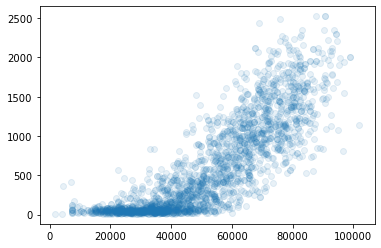

In [114]:
plt.scatter(data['Income'], data['MntAllProds'], alpha=0.1)
pass

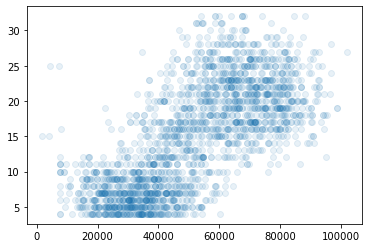

In [113]:
plt.scatter(data['Income'], data['NumPurchases'], alpha=0.1)
pass

Пустых значений нет.

Можно получить информацию о том, покупатели с каким доходом откликаются на предложения.

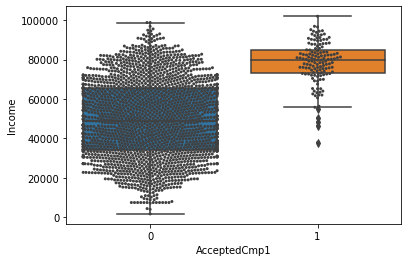

In [77]:
ax1 = sns.boxplot(x="AcceptedCmp1", y="Income", data=data)
ax1 = sns.swarmplot(x="AcceptedCmp1", y="Income", data=data, color=".25", size=3)
ax1
pass

На первую кампанию в основном откликнулись покупатели с доходом более 50 тыс.

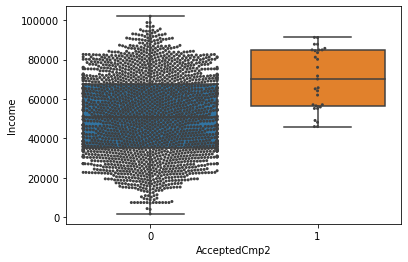

In [78]:
ax2 = sns.boxplot(x="AcceptedCmp2", y="Income", data=data)
ax2 = sns.swarmplot(x="AcceptedCmp2", y="Income", data=data, color=".25", size=3)
ax2
pass

Разброс откликов на вторую компанию не такой большой. Можно также заметить, что на вторую кампанию откликнулось не так уж много покупателей, но те, что откликнулись, это покупатели с доходом выше среднего и несколько ниже максимума.

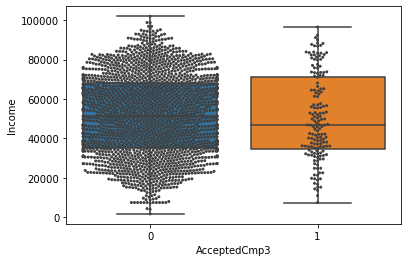

In [79]:
ax3 = sns.boxplot(x="AcceptedCmp3", y="Income", data=data)
ax3 = sns.swarmplot(x="AcceptedCmp3", y="Income", data=data, color=".25", size=3)
ax3
pass

На третью кампанию откликнулись люди с различным доходом.

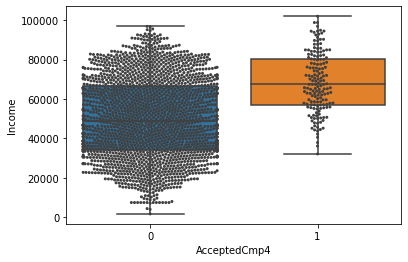

In [80]:
ax4 = sns.boxplot(x="AcceptedCmp4", y="Income", data=data)
ax4 = sns.swarmplot(x="AcceptedCmp4", y="Income", data=data, color=".25", size=3)
ax4
pass

На четвертое предложение откликнулись люди с доходом выше ~30000

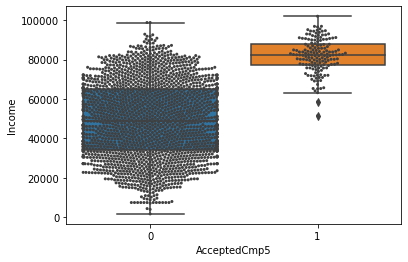

In [81]:
ax5 = sns.boxplot(x="AcceptedCmp5", y="Income", data=data)
ax5 = sns.swarmplot(x="AcceptedCmp5", y="Income", data=data, color=".25", size=3)
ax5
pass

Пятое предложение выбрали более состоятельные покупатели.

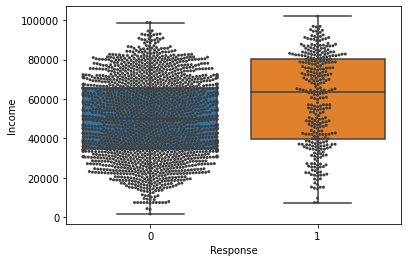

In [82]:
ax6 = sns.boxplot(x="Response", y="Income", data=data)
ax6 = sns.swarmplot(x="Response", y="Income", data=data, color=".25", size=3)
ax6
pass

Текущим предложением воспользовались покупатели с разным уровнем дохода.

# Матрица корреляции

In [83]:
corr1 = abs(data.corr())
cmap = sns.diverging_palette(5, 250, as_cmap=True)
vis = corr1.style.background_gradient(cmap, axis=1)
vis

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,age,Days_customer,MntAllProds,Children,NumPurchases,SumAcceptedCmp
Income,1.000000,0.534484,0.043187,0.008128,0.735845,0.539429,0.725880,0.553423,0.552398,0.423359,0.137959,0.489481,0.736830,0.686933,0.650025,0.011340,0.232229,0.414299,0.341268,0.103775,0.027618,0.166993,0.212498,0.030505,0.832891,0.351587,0.707734,0.386117
Kidhome,0.534484,1.000000,0.036202,0.006184,0.499214,0.374770,0.454927,0.389875,0.374060,0.352621,0.234053,0.368578,0.534274,0.510197,0.467100,0.014644,0.161082,0.204891,0.170837,0.080859,0.036050,0.075915,0.235946,0.052440,0.559067,0.690105,0.490500,0.211217
Teenhome,0.043187,0.036202,1.000000,0.012301,0.002597,0.178194,0.271681,0.210669,0.170170,0.022104,0.403758,0.156042,0.118832,0.043693,0.132469,0.048252,0.044129,0.188229,0.139561,0.012341,0.007620,0.158295,0.363560,0.015574,0.143580,0.698252,0.131279,0.126232
Recency,0.008128,0.006184,0.012301,1.000000,0.014477,0.003423,0.027138,0.002047,0.026162,0.019830,0.010689,0.008344,0.031295,0.002368,0.021910,0.040661,0.021088,0.003926,0.013412,0.004170,0.005365,0.203580,0.017223,0.023562,0.020926,0.013338,0.004707,0.010083
MntWines,0.735845,0.499214,0.002597,0.014477,1.000000,0.387838,0.605889,0.392499,0.386751,0.385688,0.002662,0.544271,0.685633,0.639978,0.336557,0.058299,0.381687,0.477167,0.353357,0.213879,0.036128,0.239443,0.162102,0.159265,0.898348,0.359478,0.723282,0.518239
MntFruits,0.539429,0.374770,0.178194,0.003423,0.387838,1.000000,0.581285,0.592740,0.575566,0.386564,0.139294,0.299269,0.527674,0.458257,0.432488,0.013563,0.006264,0.203369,0.187800,0.022133,0.002805,0.117843,0.015548,0.064325,0.618716,0.397501,0.463777,0.149938
MntMeatProducts,0.725880,0.454927,0.271681,0.027138,0.605889,0.581285,1.000000,0.607526,0.567050,0.380305,0.205386,0.336173,0.708720,0.532035,0.554728,0.023470,0.100528,0.399431,0.334003,0.042898,0.020442,0.252692,0.044536,0.082363,0.863673,0.522622,0.558580,0.329611
MntFishProducts,0.553423,0.389875,0.210669,0.002047,0.392499,0.592740,0.607526,1.000000,0.587746,0.420641,0.157726,0.290249,0.576130,0.454424,0.464534,0.003057,0.017253,0.195339,0.259839,0.003193,0.018823,0.103387,0.042201,0.075150,0.644709,0.431839,0.471949,0.175086
MntSweetProducts,0.552398,0.374060,0.170170,0.026162,0.386751,0.575566,0.567050,0.587746,1.000000,0.371632,0.143539,0.325620,0.530616,0.449087,0.441426,0.002400,0.020551,0.257507,0.240075,0.002796,0.020041,0.109975,0.013886,0.077127,0.611908,0.391182,0.469434,0.194169
MntGoldProds,0.423359,0.352621,0.022104,0.019830,0.385688,0.386564,0.380305,0.420641,0.371632,1.000000,0.045108,0.433157,0.481761,0.378367,0.269753,0.129632,0.020762,0.171786,0.163539,0.044149,0.030015,0.136619,0.059525,0.157699,0.528048,0.268597,0.506543,0.190568


Наблюдается корреляция между доходом и покупаемыми продуктами, между продуктами и способом покупки. Небольшая корреляция между ответом на текущую кампанию и откликом на предыдущие.

In [84]:
corr1 > 0.5

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,age,Days_customer,MntAllProds,Children,NumPurchases,SumAcceptedCmp
Income,True,True,False,False,True,True,True,True,True,False,False,False,True,True,True,False,False,False,False,False,False,False,False,False,True,False,True,False
Kidhome,True,True,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,True,True,False,False
Teenhome,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
Recency,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
MntWines,True,False,False,False,True,False,True,False,False,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,True,False,True,True
MntFruits,True,False,False,False,False,True,True,True,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
MntMeatProducts,True,False,False,False,True,True,True,True,True,False,False,False,True,True,True,False,False,False,False,False,False,False,False,False,True,True,True,False
MntFishProducts,True,False,False,False,False,True,True,True,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
MntSweetProducts,True,False,False,False,False,True,True,True,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
MntGoldProds,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False


In [85]:
corr1.where(np.triu(corr1 > 0.5, k=1)).stack().sort_values(ascending=False)

MntWines             MntAllProds            0.898348
MntMeatProducts      MntAllProds            0.863673
NumStorePurchases    NumPurchases           0.839374
Income               MntAllProds            0.832891
NumCatalogPurchases  MntAllProds            0.803487
NumWebPurchases      NumPurchases           0.796353
MntAllProds          NumPurchases           0.754842
NumCatalogPurchases  NumPurchases           0.739026
Income               NumCatalogPurchases    0.736830
                     MntWines               0.735845
                     MntMeatProducts        0.725880
MntWines             NumPurchases           0.723282
AcceptedCmp5         SumAcceptedCmp         0.712905
MntMeatProducts      NumCatalogPurchases    0.708720
Income               NumPurchases           0.707734
Teenhome             Children               0.698252
Kidhome              Children               0.690105
Income               NumStorePurchases      0.686933
MntWines             NumCatalogPurchases    0.

Видна зависимость количества покупок от уровня дохода, а также количество купленных продуктов одной категории от количества купленных продуктов другой категории.


# Бинаризация номинальных признаков

В датасете присутствуют два категориальных признака: Marital_Status и Education

In [86]:
data

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,age,Days_customer,MntAllProds,Children,NumPurchases,SumAcceptedCmp
0,Graduation,Single,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,63,2961,1617,0,25,0
1,Graduation,Single,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,66,2411,27,2,6,0
2,Graduation,Together,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,55,2610,776,0,21,0
3,Graduation,Together,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,36,2437,53,1,8,0
4,PhD,Married,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,39,2459,422,1,19,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,Graduation,Married,61223.0,0,1,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,0,53,2679,1341,1,18,0
2236,PhD,Together,64014.0,2,1,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,0,74,2317,444,3,22,1
2237,Graduation,Divorced,56981.0,0,0,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,0,39,2453,1241,0,19,1
2238,Master,Together,69245.0,0,1,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,0,64,2454,843,1,23,0


In [87]:
categorical_columns = getEachTypeCols(data).get('categorical')
data[categorical_columns]

,Education,Marital_Status
0,Graduation,Single
1,Graduation,Single
2,Graduation,Together
3,Graduation,Together
4,PhD,Married
...,...,...
2235,Graduation,Married
2236,PhD,Together
2237,Graduation,Divorced
2238,Master,Together


In [88]:
Education_dummies = pd.get_dummies(data['Education'])
Education_dummies.head()

,2n Cycle,Basic,Graduation,Master,PhD
0,0,0,1,0,0
1,0,0,1,0,0
2,0,0,1,0,0
3,0,0,1,0,0
4,0,0,0,0,1


In [89]:
data = pd.concat((data, Education_dummies), axis=1)
data.drop(['Education'], axis=1, inplace=True)
data

,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,age,Days_customer,MntAllProds,Children,NumPurchases,SumAcceptedCmp,2n Cycle,Basic,Graduation,Master,PhD
0,Single,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,63,2961,1617,0,25,0,0,0,1,0,0
1,Single,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,66,2411,27,2,6,0,0,0,1,0,0
2,Together,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,55,2610,776,0,21,0,0,0,1,0,0
3,Together,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,36,2437,53,1,8,0,0,0,1,0,0
4,Married,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,39,2459,422,1,19,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,Married,61223.0,0,1,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,0,53,2679,1341,1,18,0,0,0,1,0,0
2236,Together,64014.0,2,1,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,0,74,2317,444,3,22,1,0,0,0,0,1
2237,Divorced,56981.0,0,0,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,0,39,2453,1241,0,19,1,0,0,1,0,0
2238,Together,69245.0,0,1,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,0,64,2454,843,1,23,0,0,0,0,1,0


In [90]:
Mstatus_dummies = pd.get_dummies(data['Marital_Status'])
Mstatus_dummies.head()

,Divorced,Married,Single,Together,Widow
0,0,0,1,0,0
1,0,0,1,0,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,1,0,0,0


In [91]:
data = pd.concat((data, Mstatus_dummies), axis=1)
data.drop(['Marital_Status'], axis=1, inplace=True)
data.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,age,Days_customer,MntAllProds,Children,NumPurchases,SumAcceptedCmp,2n Cycle,Basic,Graduation,Master,PhD,Divorced,Married,Single,Together,Widow
0,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,63,2961,1617,0,25,0,0,0,1,0,0,0,0,1,0,0
1,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,66,2411,27,2,6,0,0,0,1,0,0,0,0,1,0,0
2,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,55,2610,776,0,21,0,0,0,1,0,0,0,0,0,1,0
3,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,36,2437,53,1,8,0,0,0,1,0,0,0,0,0,1,0
4,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,39,2459,422,1,19,0,0,0,0,0,1,0,1,0,0,0


# Нормализация количественных признаков

In [92]:
data_numerical = data[getEachTypeCols(data).get('numerical')]
data.describe()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,age,Days_customer,MntAllProds,Children,NumPurchases,SumAcceptedCmp,2n Cycle,Basic,Graduation,Master,PhD,Divorced,Married,Single,Together,Widow
count,2207.000000,2207.000000,2207.000000,2207.000000,2207.000000,2207.000000,2207.000000,2207.000000,2207.000000,2207.000000,2207.000000,2207.000000,2207.000000,2207.000000,2207.000000,2207.000000,2207.000000,2207.000000,2207.000000,2207.00000,2207.000000,2207.000000,2207.000000,2207.000000,2207.000000,2207.000000,2207.000000,2207.000000,2207.000000,2207.000000,2207.000000,2207.000000,2207.000000,2207.000000,2207.000000,2207.000000,2207.000000,2207.000000
mean,51577.054309,0.446760,0.506570,49.126869,303.205709,26.263253,163.671047,37.453557,26.707748,43.817399,2.304033,4.077028,2.601722,5.806072,5.311735,0.072497,0.074309,0.072043,0.063435,0.01314,0.009062,0.148165,51.086996,2650.763480,601.118713,0.953330,14.788854,0.295424,0.089715,0.024468,0.505211,0.166289,0.214318,0.102401,0.386951,0.218849,0.256910,0.034889
std,20449.577676,0.539254,0.545174,28.940794,334.927487,39.673875,215.105491,54.645437,40.606008,51.680970,1.828925,2.711657,2.712995,3.212552,2.344292,0.259367,0.262333,0.258619,0.243798,0.11390,0.094784,0.355344,11.720748,202.056571,598.576640,0.752811,7.461585,0.673748,0.285837,0.154531,0.500086,0.372424,0.410441,0.303244,0.487163,0.413560,0.437028,0.183540
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,24.000000,2298.000000,8.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35196.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,43.000000,2478.000000,69.000000,0.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,51111.000000,0.000000,0.000000,49.000000,176.000000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,50.000000,2651.000000,395.000000,1.000000,15.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,68122.000000,1.000000,1.000000,74.000000,502.000000,33.000000,227.500000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,61.000000,2826.000000,1033.500000,1.000000,21.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
max,101970.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,984.000000,259.000000,263.000000,362.000000,15.000000,27.000000,11.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,80.000000,2997.000000,2525.000000,3.000000,32.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [93]:
binary_data = data[getEachTypeCols(data).get('binary')]

In [94]:
data_numerical = (data_numerical - data_numerical.mean(axis = 0))/data_numerical.std(axis = 0)
frames = [data_numerical, binary_data]
result = pd.concat(frames, axis=1)

In [95]:
result.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,age,Days_customer,MntAllProds,Children,NumPurchases,SumAcceptedCmp,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,2n Cycle,Basic,Graduation,Master,PhD,Divorced,Married,Single,Together,Widow
0,0.320835,-0.828478,-0.929190,0.306596,0.990645,1.556106,1.777402,2.462172,1.509438,0.854910,0.380534,1.446707,2.726978,-0.562192,0.720160,1.016403,1.535394,1.697162,-1.266361,1.368496,-0.438478,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0
1,-0.255900,1.025935,0.905088,-0.384470,-0.872445,-0.636773,-0.732994,-0.648793,-0.633102,-0.731747,-0.166236,-1.134741,-0.590389,-1.184750,-0.132976,1.272359,-1.186616,-0.959140,1.390349,-1.177880,-0.438478,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
2,0.979773,-0.828478,-0.929190,-0.799110,0.366629,0.573091,-0.170479,1.345884,-0.140564,-0.035166,-0.713005,1.446707,-0.221792,1.305482,-0.559544,0.333853,-0.201743,0.292162,-1.266361,0.832416,-0.438478,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
3,-1.219148,1.025935,-0.929190,-0.799110,-0.872445,-0.561157,-0.667910,-0.502394,-0.583848,-0.751097,-0.166236,-0.765962,-0.958985,-0.562192,0.293592,-1.287204,-1.057939,-0.915703,0.061994,-0.909841,-0.438478,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
4,0.328415,1.025935,-0.929190,1.550515,-0.388758,0.421858,-0.212319,0.156398,0.007197,-0.557602,1.474072,0.340372,0.146804,0.060366,-0.132976,-1.031248,-0.949058,-0.299241,0.061994,0.564377,-0.438478,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0


# Отбор признаков

In [96]:
X = result.drop('Response', axis = 1) # выбрасываем столбец 'Response'
y = result['Response']

In [97]:
X = X.to_numpy()
y = np.array(y, dtype='int')

In [98]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, 
                                                    random_state = 42)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

print(N_train, N_test)

1544 663


# Метод KNN

In [99]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [100]:
y_test_predict = knn.predict(X_test)
y_train_predict = knn.predict(X_train)
err_test  = np.mean(y_test  != y_test_predict)
err_train = np.mean(y_train != y_train_predict)
print(err_train, err_test)

0.12564766839378239 0.1282051282051282


In [101]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_test_predict))
print(classification_report(y_test, y_test_predict))

[[560   6]
 [ 79  18]]
              precision    recall  f1-score   support

           0       0.88      0.99      0.93       566
           1       0.75      0.19      0.30        97

    accuracy                           0.87       663
   macro avg       0.81      0.59      0.61       663
weighted avg       0.86      0.87      0.84       663



In [102]:
y_actu = pd.Series(y_test, name='Actual')
y_pred = pd.Series(y_test_predict, name='Predicted')
df_confusion = pd.crosstab(y_actu, y_pred)

In [103]:
df_confusion

Predicted,0,1
Actual,,
0,560,6
1,79,18


Посмотрим, какое количество соседей наилучшее для метода KNN в нашем случае.

In [104]:
from sklearn.model_selection import GridSearchCV
nnb = [1, 3, 5, 10, 15, 20, 25, 35, 45, 55]
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid = {'n_neighbors': nnb}, cv=10)
grid.fit(X_train, y_train)

best_cv_err = 1 - grid.best_score_
best_n_neighbors = grid.best_estimator_.n_neighbors
print(best_cv_err, best_n_neighbors)

0.13602848764139086 10


In [105]:
knn1 = KNeighborsClassifier(n_neighbors = best_n_neighbors)
knn1.fit(X_train, y_train)

y_test_predict_1 = knn1.predict(X_test)
y_train_predict_1 = knn1.predict(X_train)

err_train_1 = np.mean(y_train != knn1.predict(X_train))
err_test_1  = np.mean(y_test  != knn1.predict(X_test))

print(err_train_1, err_test_1)

0.12564766839378239 0.1282051282051282


In [106]:
print(confusion_matrix(y_test, y_test_predict_1))
print(classification_report(y_test, y_test_predict_1))

[[560   6]
 [ 79  18]]
              precision    recall  f1-score   support

           0       0.88      0.99      0.93       566
           1       0.75      0.19      0.30        97

    accuracy                           0.87       663
   macro avg       0.81      0.59      0.61       663
weighted avg       0.86      0.87      0.84       663



# Вывод

Метод KNN показал плохие результаты для предсказания положительного отклика на маркетинговую кампанию. Значение "True positive" очень маленькое по сравнению с "False Negative" (значение recall для 1).
Необходимо улучшить отбор признаков и попробовать другие алгоритмы машинного обучения.

# SVC

In [107]:
from sklearn.svm import SVC
svc = SVC(gamma='auto')
svc.fit(X_train, y_train)

err_train = np.mean(y_train != svc.predict(X_train))
err_test  = np.mean(y_test  != svc.predict(X_test))

print(err_train, err_test)

0.09326424870466321 0.09502262443438914


In [139]:
from sklearn import ensemble
rf = ensemble.RandomForestClassifier(n_estimators = 500)
rf.fit(X_train, y_train)

err_train = np.mean(y_train != rf.predict(X_train))
err_test  = np.mean(y_test  != rf.predict(X_test))

print(err_train, err_test)

0.008419689119170985 0.10256410256410256


In [115]:
ert = ensemble.ExtraTreesClassifier(n_estimators = 100).fit(X_train, y_train)

err_train = np.mean(y_train != ert.predict(X_train))
err_test  = np.mean(y_test  != ert.predict(X_test))

print(err_train, err_test)

0.008419689119170985 0.11764705882352941


In [116]:

ada = ensemble.AdaBoostClassifier(n_estimators = 1000)
ada.fit(X_train, y_train)

err_train = np.mean(y_train != ada.predict(X_train))
err_test = np.mean(y_test != ada.predict(X_test))

print(err_train, err_test)

0.012953367875647668 0.10256410256410256


In [117]:
gbt = ensemble.GradientBoostingClassifier(n_estimators = 1000)
gbt.fit(X_train, y_train)

err_train = np.mean(y_train != gbt.predict(X_train))
err_test = np.mean(y_test != gbt.predict(X_test))

print(err_train, err_test)

0.008419689119170985 0.09954751131221719


# PCA

In [118]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca.fit(X)
X_proj = pca.transform(X)
N, d = X.shape
print(X.shape)
print(X_proj.shape)

(2207, 37)
(2207, 2)


No handles with labels found to put in legend.


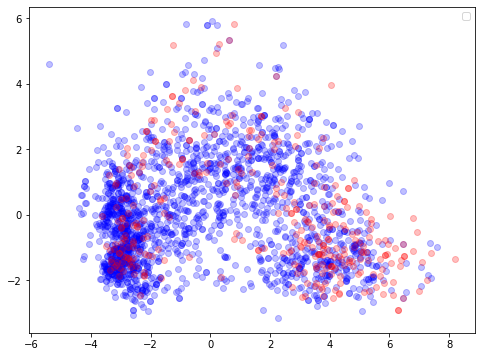

In [119]:
plt.figure(figsize = (8, 6))
colors = ['b', 'r']
for k in range(2):
    plt.scatter(X_proj[y == k, 0], X_proj[y == k, 1], color = colors[k], alpha = 0.25)
plt.legend()
pass

In [120]:
pca = PCA(n_components = d)
pca.fit(X)
X_proj = pca.transform(X)

In [121]:
sum_variances = np.sum(pca.explained_variance_)
cumsum_variances = np.cumsum(pca.explained_variance_)
alpha = 0.95
s = np.argmax(cumsum_variances/sum_variances > alpha) + 1 
print(s)

19


In [122]:
from sklearn.svm import SVC
print('n components', 'train error', 'test error')
for n_comp in [1, 5, 10, 15, 20, 25, d]:
    pca = PCA(n_components = n_comp)
    pca.fit(X_train, y_train)
    X_train_pca = pca.transform(X_train)
    X_test_pca  = pca.transform(X_test)
    svc = SVC(kernel = 'linear')
    svc.fit(X_train_pca, y_train)   
    y_train_pred = svc.predict(X_train_pca)
    y_test_pred  = svc.predict(X_test_pca)
    print ('      %3d        %7.4f    %7.4f' % (n_comp, np.mean(y_train != y_train_pred), np.mean(y_test != y_test_pred)))

n components train error test error
        1         0.1490     0.1463
        5         0.1490     0.1463
       10         0.1256     0.1071
       15         0.1166     0.1086
       20         0.0984     0.1026
       25         0.1010     0.0980
       37         0.1004     0.0935


In [160]:
from sklearn.model_selection import cross_validate, cross_val_score, train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
pca = PCA(n_components = 19)
pca.fit(X_train)
X_t_train = pca.transform(X_train)
X_t_test = pca.transform(X_test)
clf = SVC()
clf.fit(X_t_train, y_train)
err_train = np.mean(y_train != clf.predict(X_t_train))
err_test = np.mean(y_test != clf.predict(X_t_test))
print (err_train, err_test)

0.08031088082901554 0.13423831070889894


# SVM

In [166]:
svc_model = SVC(kernel = 'linear')
svc_model.fit(X_train, y_train)

SVC(kernel='linear')

In [167]:
err_train = np.mean(y != svc_model.predict(X))
err_test = np.mean(y_test != svc_model.predict(X_test))
print (err_train, err_test)

0.09832351608518351 0.11010558069381599


# PCA test

In [127]:
from sklearn.decomposition import PCA

from sklearn import preprocessing

In [128]:
scaled_data = preprocessing.scale(data.T)

In [129]:
pca = PCA()
pca.fit(scaled_data)
pca_data = pca.transform(scaled_data)

In [130]:
per_var = np.round(pca.explained_variance_ratio_*100, decimals=1)

In [131]:
per_var

array([99.8,  0.2,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
        0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
        0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
        0. ,  0. ,  0. ,  0. ,  0. ])

In [132]:
labels = data.columns.tolist()
labels

['Income',
 'Kidhome',
 'Teenhome',
 'Recency',
 'MntWines',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds',
 'NumDealsPurchases',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases',
 'NumWebVisitsMonth',
 'AcceptedCmp3',
 'AcceptedCmp4',
 'AcceptedCmp5',
 'AcceptedCmp1',
 'AcceptedCmp2',
 'Complain',
 'Response',
 'age',
 'Days_customer',
 'MntAllProds',
 'Children',
 'NumPurchases',
 'SumAcceptedCmp',
 '2n Cycle',
 'Basic',
 'Graduation',
 'Master',
 'PhD',
 'Divorced',
 'Married',
 'Single',
 'Together',
 'Widow']

<function matplotlib.pyplot.show(*args, **kw)>

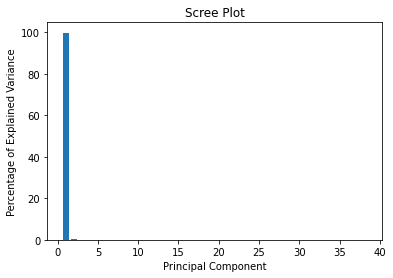

In [133]:
plt.bar(x=range(1,len(per_var)+1), height=per_var)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show

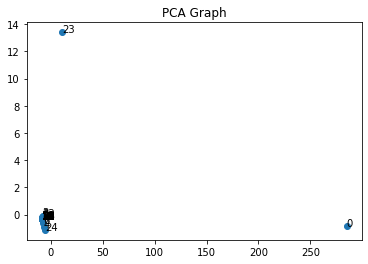

In [134]:
pca_df = pd.DataFrame(pca_data, columns=labels)
plt.scatter(pca_df.Income, pca_df.Kidhome)
plt.title('PCA Graph')
for sample in pca_df.index:
    plt.annotate(sample, (pca_df.Income.loc[sample], pca_df.Kidhome.loc[sample]))
plt.show()

data_lin = data_raw.copy()

data_lin['WinePart'] = data_lin.loc[:,'MntWines']/data_lin.loc[:,'MntAllProds']

data_lin['FruitPart'] = data_lin.loc[:,'MntFruits']/data_lin.loc[:,'MntAllProds']
data_lin['MeatPart'] = data_lin.loc[:,'MntMeatProducts']/data_lin.loc[:,'MntAllProds']
data_lin['FishPart'] = data_lin.loc[:,'MntFishProducts']/data_lin.loc[:,'MntAllProds']
data_lin['SweetPart'] = data_lin.loc[:,'MntSweetProducts']/data_lin.loc[:,'MntAllProds']
data_lin['GoldPart'] = data_lin.loc[:,'MntGoldProds']/data_lin.loc[:,'MntAllProds']
rows_to_drop1 = ['MntFruits', 'MntMeatProducts', 'MntFishProducts', 
                 'MntSweetProducts', 'MntGoldProds', 'MntWines', 
                 'Kidhome', 'Teenhome']
data_lin = data_lin.drop(rows_to_drop1, axis=1)

data_lin

data_raw['NumDealsPurchases'] = data_raw['NumDealsPurchases']/data_lin['NumPurchases']
data_lin['NumWebPurchases'] = data_lin['NumWebPurchases']/data_lin['NumPurchases']
data_lin['NumCatalogPurchases'] = data_lin['NumCatalogPurchases']/data_lin['NumPurchases']
data_lin['NumStorePurchases'] = data_lin['NumStorePurchases']/data_lin['NumPurchases']
data_lin.iloc[:,4:8]